In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Download Housing Data from GitHub
# Store Housing Data as 'final_project.csv'

In [3]:
url = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
r = requests.get(url, allow_redirects=True)
open('final_project.csv', 'wb').write(r.content)
df = pd.read_csv('final_project.csv')

In [4]:
# Factors might affect the SalePrice
# MSZoning, LotShape, w, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, Foundation, Electrical

In [5]:
# Drop off the NULL values
# Scatter Plot as blue spots
# Save figure as 'YearBuilt_SalePrice_scatter.png'

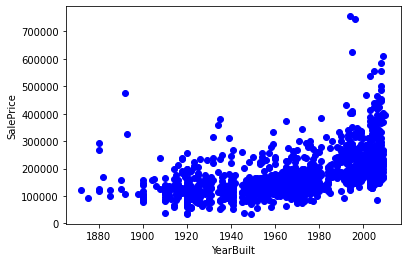

In [6]:
data = df[['YearBuilt', 'SalePrice']].dropna()
x_value = data['YearBuilt']
y_value = data['SalePrice']
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.savefig('YearBuilt_SalePrice_scatter.png')

In [7]:
# According to the shape of scatter pointers
# It is closer to Polynomial Regression Curve fit rather than Linear Regression

In [8]:
# the oldest house YearBuilt 1872
# the newest house YearBuilt 2010
# YearBuilt as the x_value
# SalePrice as the y_value

In [9]:
data.describe()

,YearBuilt,SalePrice
count,1460.000000,1460.000000
mean,1971.267808,180921.195890
std,30.202904,79442.502883
min,1872.000000,34900.000000
25%,1954.000000,129975.000000
50%,1973.000000,163000.000000
75%,2000.000000,214000.000000
max,2010.000000,755000.000000


In [10]:
# numpy.polyfit (X, Y, deg, rcond=None, full=False, w=None, cov=False)
# Return Value
# It returns a ndarray, shape (deg+1,) or (deg+1, K)
# X: array_like,
# Y: array_like,
# deg: int,
# It should be an integer value and specify the degree to which polynomial should be made fit.
# rcond: float,
# full: It’s an optional parameter of Boolean type,
# w: array_like, shape(M,), optional,
# cov: bool or str, optional parameter,
# y = a0 + a1x + a2x^2 + … + anx^n
# calculating value of coefficient in case of cubic polynomial
# numpy.polyfit = a0 + a1x + a2x^2 + a3x^3

In [11]:
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)

In [12]:
polynomial_degree_3

array([ 8.92851052e-02, -5.01672131e+02,  9.38656738e+05, -5.84675974e+08])

In [13]:
# np.poly1d([1, 2, 3]) --> 1*x^2 + 2*x^1 + 3*x^0
# Construct the polynomial:
# >>> p = np.poly1d([1, 2, 3])
# >>> print(np.poly1d(p))
# >>> 2
#     1 x + 2 x + 3
# Evaluate the polynomial at:
# >>> p(0.5)
#     4.25

In [14]:
mymodel = np.poly1d(polynomial_degree_3)

In [15]:
# numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)
# -> start  : [optional] start of interval range. By default start = 0
# -> stop   : end of interval range
# -> restep : If True, return (samples, step). By deflut restep = False
# -> num    : [int, optional] No. of samples to generate
# -> dtype  : type of output array

In [16]:
# start = the oldest 1872
# end = the newest 2010
# num = end - start = 138

In [17]:
myline = np.linspace(1872, 2010, num=138)

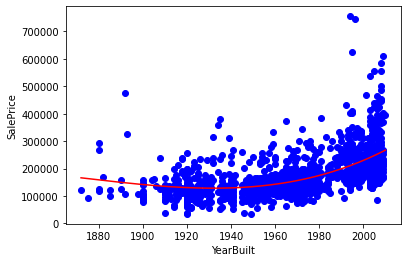

In [18]:
plt.scatter(x_value, y_value, color='blue')
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.savefig('YearBuilt_SalePrice_scatter_polynomial_3.png')

In [19]:
# Remove outliers with maximum 2 standard deviation
# reject_outliers(data, m=2)

In [20]:
def reject_outliers(data, m=2):
    return pd.DataFrame(data[abs(data - np.mean(data)) < m * np.std(data)])

In [21]:
data = reject_outliers(data)

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [22]:
data = data[~(np.isnan(data).any(axis=1))]

In [23]:
data.describe()

,YearBuilt,SalePrice
count,1351.000000,1351.000000
mean,1972.433753,171279.890452
std,27.423642,58665.469121
min,1911.000000,34900.000000
25%,1955.000000,130000.000000
50%,1972.000000,160000.000000
75%,2000.000000,205000.000000
max,2009.000000,339750.000000


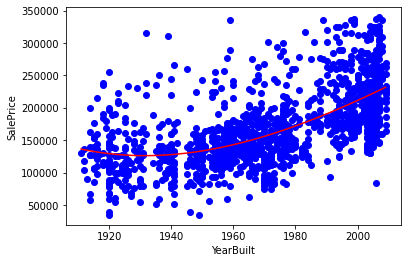

In [24]:
x_value = data['YearBuilt']
y_value = data['SalePrice']
polynomial_degree_3 = np.polyfit(x_value, y_value, 3)
mymodel = np.poly1d(polynomial_degree_3)
polynomial_degree_3
myline = np.linspace(1911, 2009, num=98)
plt.scatter(x_value, y_value, color='blue')
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.savefig('YearBuilt_SalePrice_scatter_polynomial_3_remove_outliers.png')

In [25]:
# The shape of the housing data without outliers is also seem to fit by using linear regression

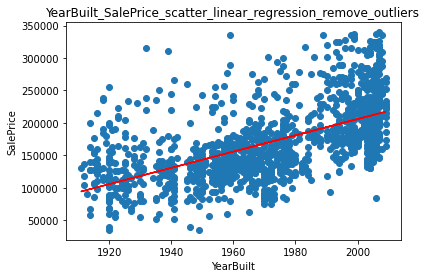

In [26]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('YearBuilt_SalePrice_scatter_linear_regression_remove_outliers')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.savefig('YearBuilt_SalePrice_scatter_linear_regression_remove_outliers.png')

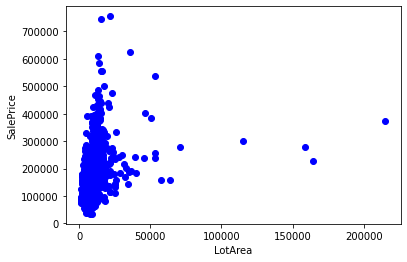

In [27]:
data = df[['LotArea', 'SalePrice']].dropna()
x_value = data['LotArea']
y_value = data['SalePrice']
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.savefig('LotArea_SalePrice.png')
# According to the shape of scatter pointers
# It is closer to linear regression

In [28]:
data = reject_outliers(data)
data = data[~(np.isnan(data).any(axis=1))]

/Users/huangyin/PycharmProjects/pythonProject1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [29]:
data.describe()

,LotArea,SalePrice
count,1380.000000,1380.000000
mean,9503.316667,169424.794928
std,3841.799392,58843.413729
min,1300.000000,34900.000000
25%,7406.750000,128500.000000
50%,9249.000000,158250.000000
75%,11242.750000,202500.000000
max,29959.000000,339750.000000


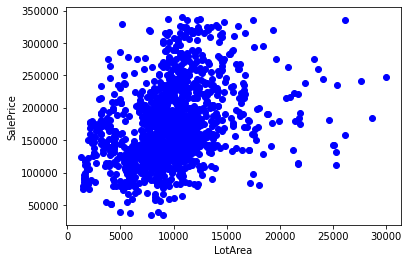

In [30]:
x_value = data['LotArea']
y_value = data['SalePrice']
plt.scatter(x_value, y_value, color='blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.savefig('LotArea_SalePrice_remove_outliers.png')

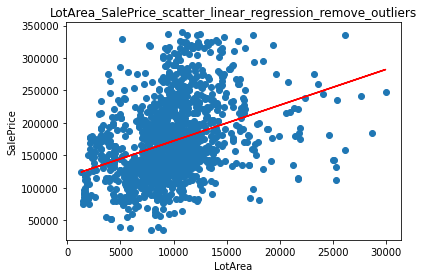

In [31]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('LotArea_SalePrice_scatter_linear_regression_remove_outliers')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.savefig('LotArea_SalePrice_scatter_linear_regression_remove_outliers')

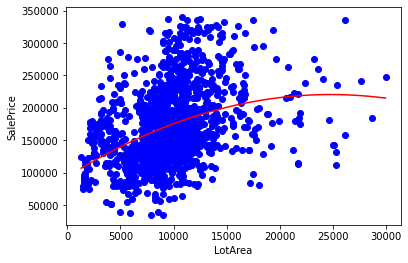

In [32]:
x_value = data['LotArea']
y_value = data['SalePrice']
polynomial_degree_2 = np.polyfit(x_value, y_value,2)
mymodel = np.poly1d(polynomial_degree_2)
polynomial_degree_2
myline = np.linspace(1300, 29959, num=28659)
plt.scatter(x_value, y_value, color='blue')
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.savefig('LotArea_SalePrice_scatter_polynomial_2_remove_outliers.png')